# UoG-DA_Group28 Jupyter Notebook: Classification - Neural Network (MLP)

<hr>

## <u> Initial Setup </u>

In [1]:
from utils import *

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load the Datasets
dataset_1 = load_from_pickle("cir_ncir_agg.pkl", "./pickled_data_sets")
dataset_2 = load_from_pickle("cir_ncir_pca.pkl", "./pickled_data_sets")

## <u> Training and Analysis </u>

### <b> Dataset: cir_ncir_agg </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [2]:
# Select the features to be used for Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the Multi-Layer Perceptron (MLP) model based on several `hidden_layer_sizes` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `solver` : `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
- `learning_rate` : `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5
- `max_iter` : 1000 

Hidden Layer Size:  [2]
Training Accuracy:  0.5012585034013606
Testing Accuracy:  0.496984126984127
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.5012925170068028
Testing Accuracy:  0.496984126984127
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.8218027210884353
Testing Accuracy:  0.824047619047619
Hidden Layer Size:  [5]
Training Accuracy:  0.5012925170068028
Testing Accuracy:  0.496984126984127
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.5012244897959184
Testing Accuracy:  0.496984126984127
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8525850340136054
Testing Accuracy:  0.8571428571428571
Hidden Layer Size:  [10]
Training Accuracy:  0.8335034013605442
Testing Accuracy:  0.834920634920635
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.8393197278911565
Testing Accuracy:  0.8398412698412698
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.835
Testing Accuracy:  0.8394444444444444
Hidden Layer Size:  [20]
Training Accuracy:  0.78921768707483
Testing Accurac

Text(0, 0.5, 'Accuracy')

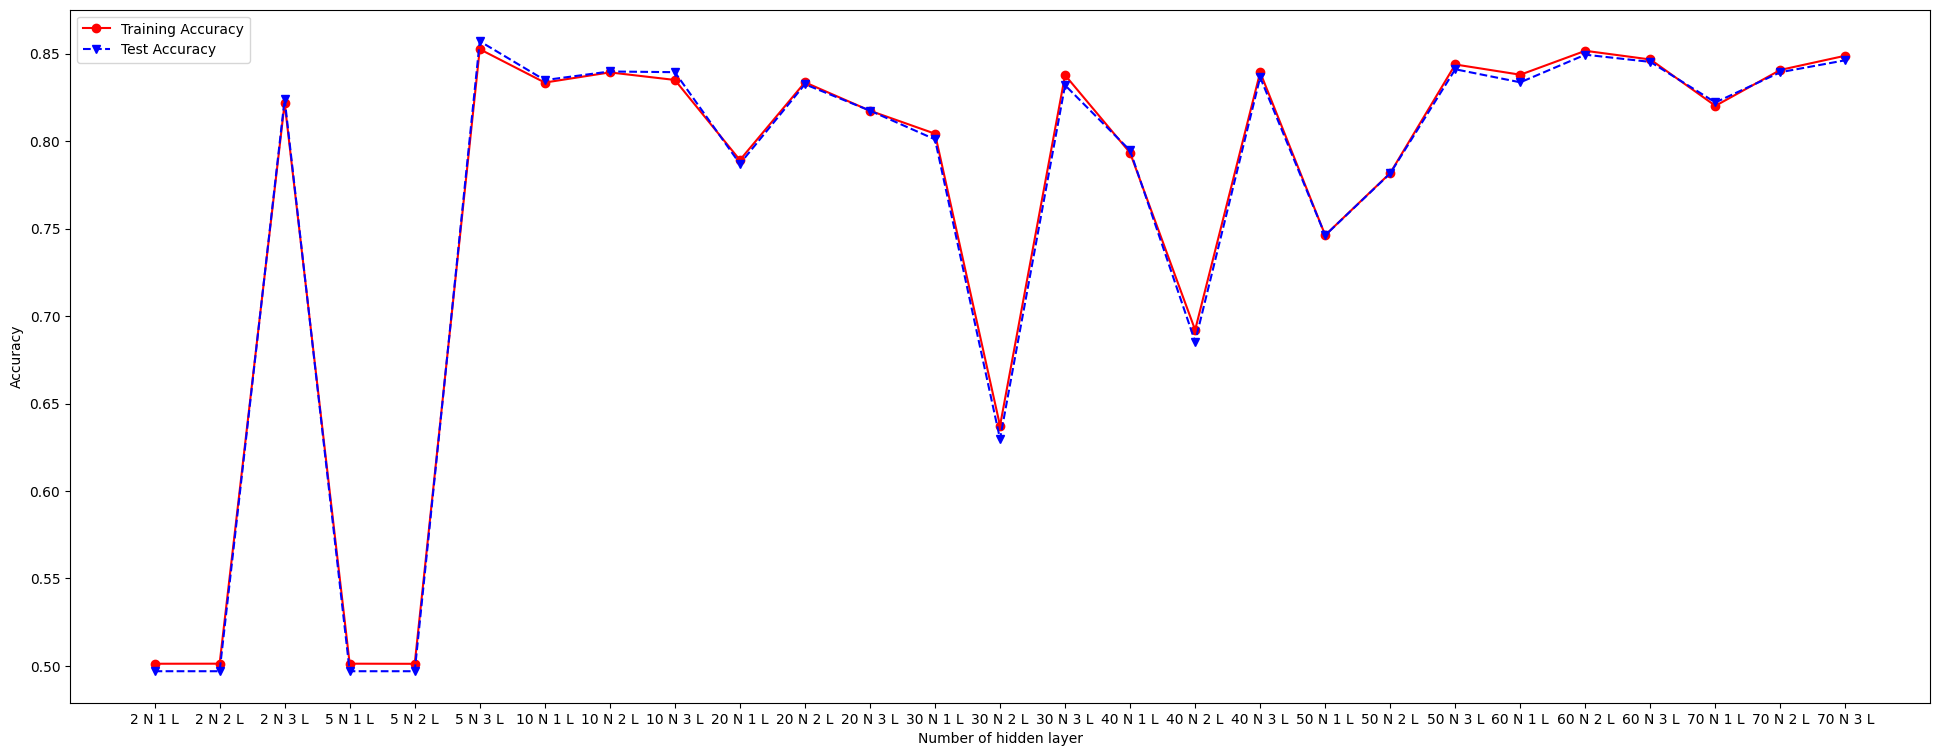

In [3]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

hidden_layer_titles = ["2 N 1 L", "2 N 2 L", "2 N 3 L", "5 N 1 L", "5 N 2 L", "5 N 3 L", "10 N 1 L", "10 N 2 L", "10 N 3 L", "20 N 1 L", "20 N 2 L", "20 N 3 L", "30 N 1 L", "30 N 2 L", "30 N 3 L", "40 N 1 L", "40 N 2 L", "40 N 3 L", "50 N 1 L", "50 N 2 L", "50 N 3 L", "60 N 1 L", "60 N 2 L", "60 N 3 L", "70 N 1 L", "70 N 2 L", "70 N 3 L"]
hidden_layer_sizes = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Hidden Layer Size:  [2]
Training Accuracy:  0.5022916666666667
Testing Accuracy:  0.49083333333333334
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.5023214285714286
Testing Accuracy:  0.49083333333333334
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.8438392857142857
Testing Accuracy:  0.8436904761904762
Hidden Layer Size:  [5]
Training Accuracy:  0.5023214285714286
Testing Accuracy:  0.4907142857142857
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.5022916666666667
Testing Accuracy:  0.4907142857142857
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8491369047619047
Testing Accuracy:  0.8501190476190477
Hidden Layer Size:  [10]
Training Accuracy:  0.7363690476190476
Testing Accuracy:  0.7436904761904762
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.8272321428571429
Testing Accuracy:  0.8204761904761905
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8517857142857143
Testing Accuracy:  0.8488095238095238
Hidden Layer Size:  [20]
Training Accuracy:  0.777678571

Text(0, 0.5, 'Accuracy')

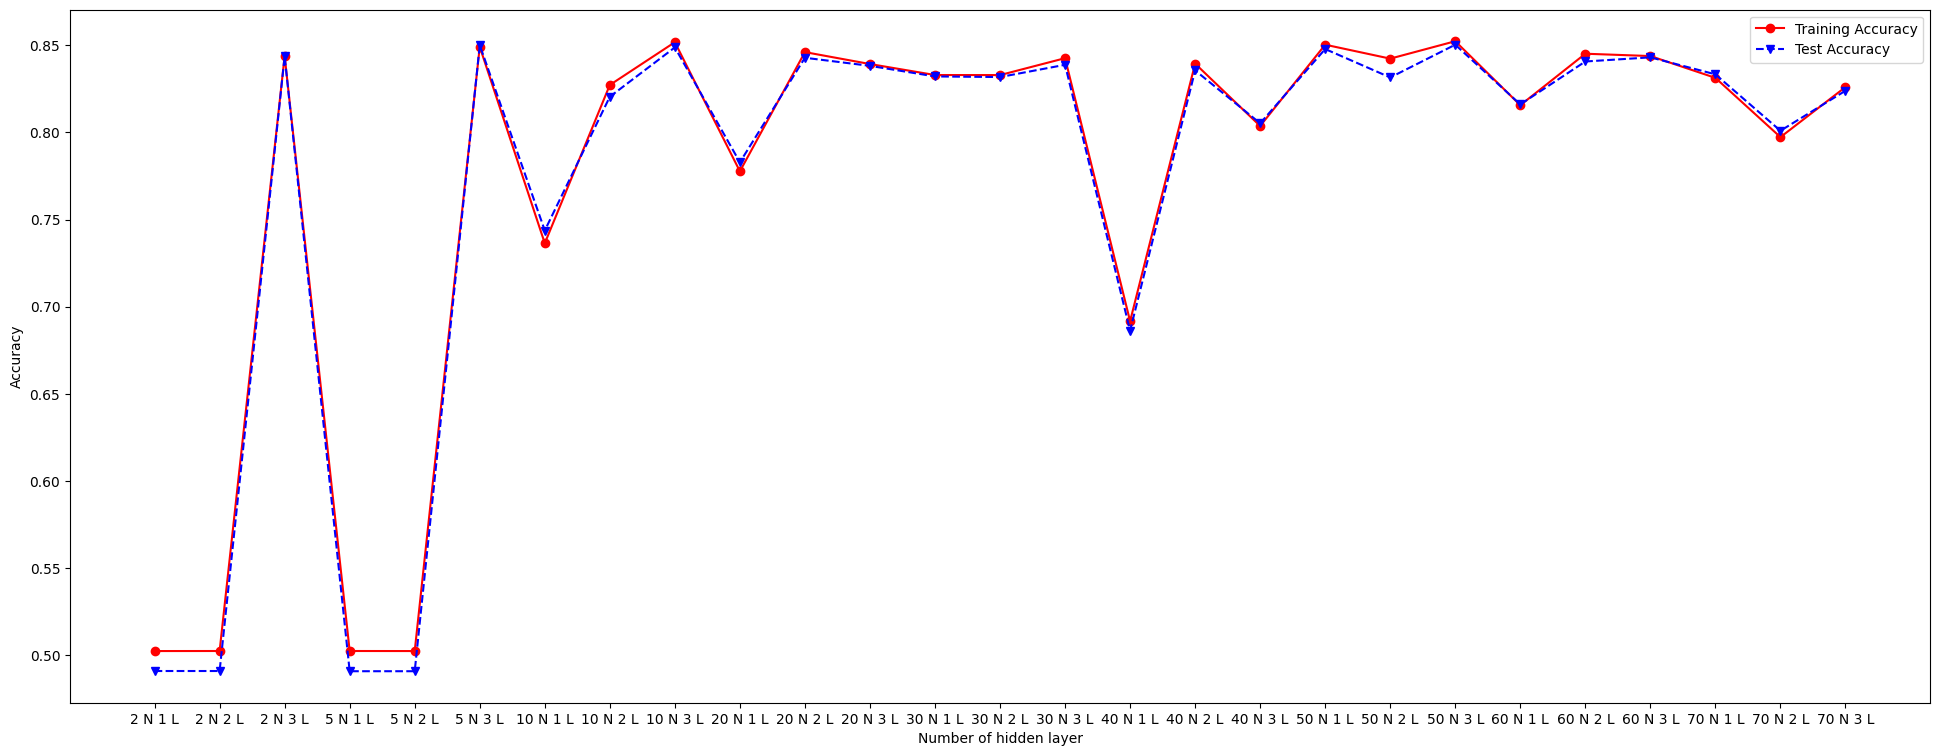

In [4]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe erratic progressions for both 'Training Accuracy' and 'Test Accuracy' with certain combinations Layer and Perception count combinations showing a higher 'Test Accuracy'.

The peak for the 'Training Accuracy' and 'Test Accuracy' line has been identified at `hidden_layer_sizes = [5, 5, 5]` or 3 Layers of 5 Neurons

We will this use this max-depth as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits for consistency
- `hidden_layer_sizes` : `[5, 5, 5]`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [5]:
HIDDEN_LAYER_SIZE = [5, 5, 5]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8525850340136054
Testing Accuracy:  0.8571428571428571


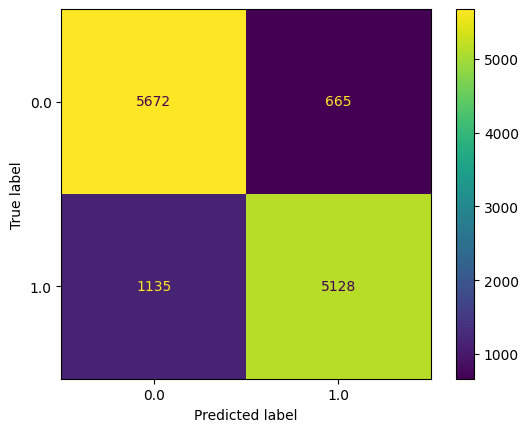

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      6337
         1.0       0.89      0.82      0.85      6263

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600



In [6]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [7]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8491369047619047
Testing Accuracy:  0.8501190476190477


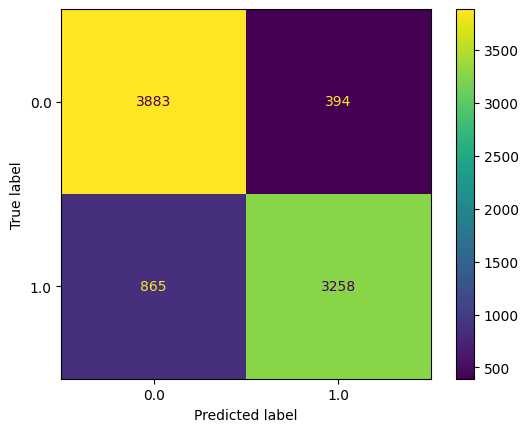

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      4277
         1.0       0.89      0.79      0.84      4123

    accuracy                           0.85      8400
   macro avg       0.85      0.85      0.85      8400
weighted avg       0.85      0.85      0.85      8400



In [8]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

### <b> Dataset: cir_ncir_pca </b>

#### 70:30 vs 80:20 split

We will first look to split the dataset into 2 further subsets to look at the effects of 2 common 'training' : 'testing' data ratio splits: 
- 70 : 30 
- 80 : 20

In [9]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

# Create the Training and Test set with split 80:20 
X_train_80_20, X_test_80_20, Y_train_80_20, Y_test_80_20 = train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

#### Parameter tuning and Training vs Testing Accuracy

We will first look to train and plot the Multi-Layer Perceptron (MLP) model based on several `hidden_layer_sizes` for both 70:30 and 80:20 dataset splits in order to obtain the most optimal results

Other parameters will follow the defaults provided in previous lab exercises:

- `solver` : `adam` Stochastic gradient-based optimiser proposed by Kingma, Diederik, and Jimmy Ba
- `learning_rate` : `adaptive` Keeps the learning rate constant to default 0.001 if the training loss keeps decreasing but for every 2 consecutive epochs fail to decrease the training loss, the current learning rate is divided by 5
- `max_iter` : 1000 

Hidden Layer Size:  [2]
Training Accuracy:  0.6295238095238095
Testing Accuracy:  0.6322222222222222
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.7074829931972789
Testing Accuracy:  0.7121428571428572
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.7579591836734694
Testing Accuracy:  0.7569047619047619
Hidden Layer Size:  [5]
Training Accuracy:  0.7227891156462585
Testing Accuracy:  0.7207142857142858
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.7391836734693877
Testing Accuracy:  0.7396031746031746
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8547278911564626
Testing Accuracy:  0.846984126984127
Hidden Layer Size:  [10]
Training Accuracy:  0.7963605442176871
Testing Accuracy:  0.7980158730158731
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.7281292517006803
Testing Accuracy:  0.7223015873015873
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8660204081632653
Testing Accuracy:  0.8597619047619047
Hidden Layer Size:  [20]
Training Accuracy:  0.804387755102

Text(0, 0.5, 'Accuracy')

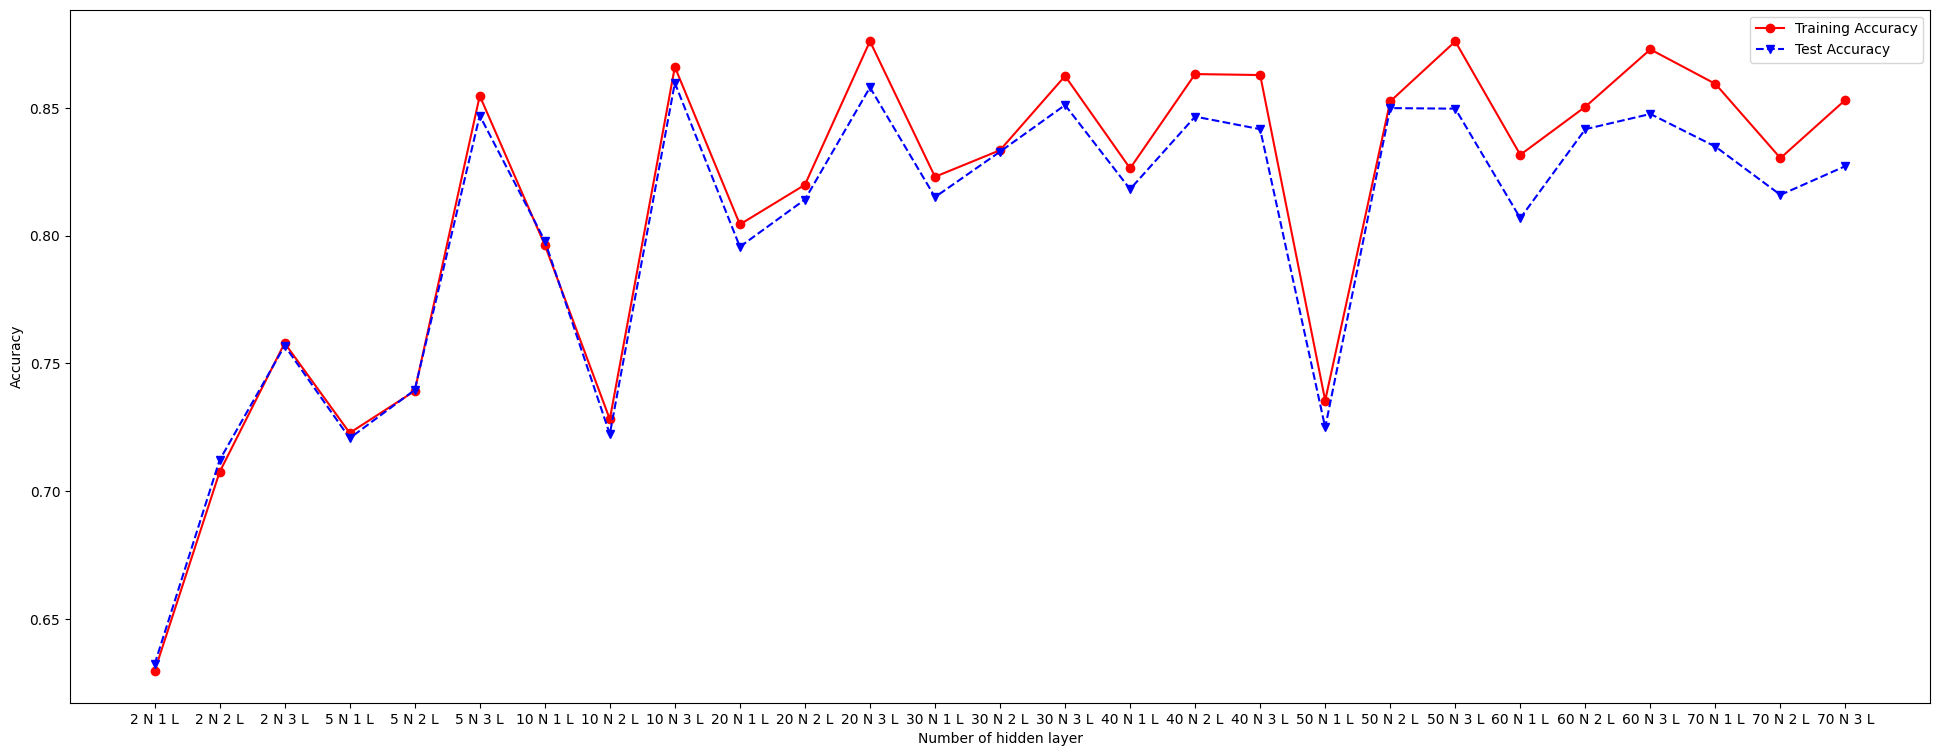

In [10]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

hidden_layer_titles = ["2 N 1 L", "2 N 2 L", "2 N 3 L", "5 N 1 L", "5 N 2 L", "5 N 3 L", "10 N 1 L", "10 N 2 L", "10 N 3 L", "20 N 1 L", "20 N 2 L", "20 N 3 L", "30 N 1 L", "30 N 2 L", "30 N 3 L", "40 N 1 L", "40 N 2 L", "40 N 3 L", "50 N 1 L", "50 N 2 L", "50 N 3 L", "60 N 1 L", "60 N 2 L", "60 N 3 L", "70 N 1 L", "70 N 2 L", "70 N 3 L"]
hidden_layer_sizes = [[2], [2, 2], [2, 2, 2], [5], [5, 5], [5, 5, 5], [10], [10, 10], [10, 10, 10], [20], [20, 20], [20, 20, 20], [30], [30, 30], [30, 30, 30], [40], [40, 40], [40, 40, 40], [50], [50, 50], [50, 50, 50], [60], [60, 60], [60, 60, 60], [70], [70, 70], [70, 70, 70]]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_70_30, Y_train_70_30)
    Y_predTrain = clf.predict(X_train_70_30)
    Y_predTest = clf.predict(X_test_70_30)
    trainAcc.append(accuracy_score(Y_train_70_30, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_70_30, Y_predTest))
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

Hidden Layer Size:  [2]
Training Accuracy:  0.6306845238095238
Testing Accuracy:  0.6421428571428571
Hidden Layer Size:  [2, 2]
Training Accuracy:  0.7188988095238096
Testing Accuracy:  0.7285714285714285
Hidden Layer Size:  [2, 2, 2]
Training Accuracy:  0.6232440476190476
Testing Accuracy:  0.6377380952380952
Hidden Layer Size:  [5]
Training Accuracy:  0.6967559523809523
Testing Accuracy:  0.7015476190476191
Hidden Layer Size:  [5, 5]
Training Accuracy:  0.8504761904761905
Testing Accuracy:  0.846547619047619
Hidden Layer Size:  [5, 5, 5]
Training Accuracy:  0.8515178571428571
Testing Accuracy:  0.8469047619047619
Hidden Layer Size:  [10]
Training Accuracy:  0.7826785714285714
Testing Accuracy:  0.7811904761904762
Hidden Layer Size:  [10, 10]
Training Accuracy:  0.8585416666666666
Testing Accuracy:  0.8575
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8666071428571429
Testing Accuracy:  0.8578571428571429
Hidden Layer Size:  [20]
Training Accuracy:  0.8334821428571428
Testing

Text(0, 0.5, 'Accuracy')

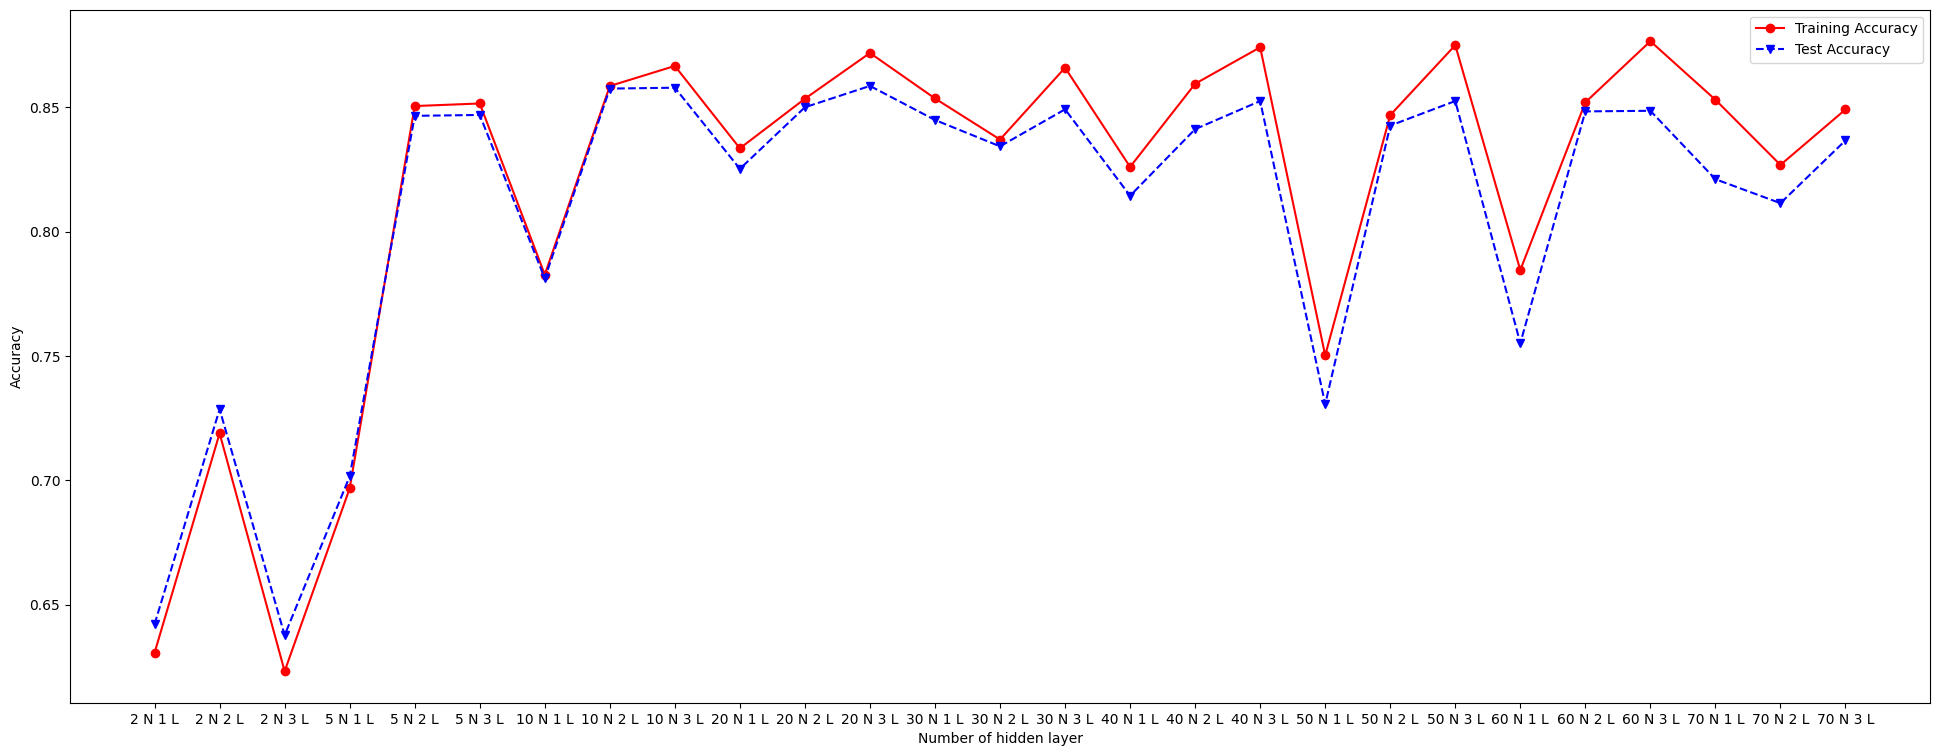

In [11]:
###########################################################################
# Model fit and performance evaluation for various tree depth from 2-50
###########################################################################

trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='constant',random_state=RANDOM_STATE,max_iter=1000)
    clf.fit(X_train_80_20, Y_train_80_20)
    Y_predTrain = clf.predict(X_train_80_20)
    Y_predTest = clf.predict(X_test_80_20)
    trainAcc.append(accuracy_score(Y_train_80_20, Y_predTrain))
    testAcc.append(accuracy_score(Y_test_80_20, Y_predTest))
    print("Hidden Layer Size: ", k)
    print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
    print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

###########################################################################
# Plot training and test accuracies
##########################################################################
plt.figure(figsize = (24, 9))
plt.plot(hidden_layer_titles, trainAcc, 'ro-', hidden_layer_titles, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

#### Model Training and Assessment

From the 70:30 and 80:20 splits, we can observe erratic progressions for both 'Training Accuracy' and 'Test Accuracy' with certain combinations Layer and Perception count combinations showing a higher 'Test Accuracy'.

The peak for the 'Test Accuracy' line has been identified at `hidden_layer_sizes = [10, 10, 10]` or 3 Layers of 10 Neurons

We will this use this max-depth as the optimal parameter for our Decision Tree models for both 70:30 and 80:20 splits for consistency
- `hidden_layer_sizes` : `[10, 10, 10]`

We will then utilize a confusion matrix as well as classification report to perform an analysis of the model's accuracy based on several metrics (information obtained from [1][2]):
- `accuracy` : The proportion of all classifications that were correct, whether positive or negative
- `precision` : The proportion of all the model's positive classifications that are actually positive
- `recall` :  The proportion of all actual positives that were classified correctly as positives
- `f1-score` : The harmonic mean (a kind of average) of precision and recall, accounts for class-imbalances in dataset

For convenience sake we will utilize the `classification_report` function from the `sklearn.metrics`, which will not only break it down by these metrics by class but also provides us with the `Support` (i.e how many samples are in each class) alongside the `macro avg` (Averages for each class without considering class imbalance) and `weighted avg`(Averages for each class considers class imbalance)

In [12]:
HIDDEN_LAYER_SIZE = [10, 10, 10]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))

Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8660204081632653
Testing Accuracy:  0.8597619047619047


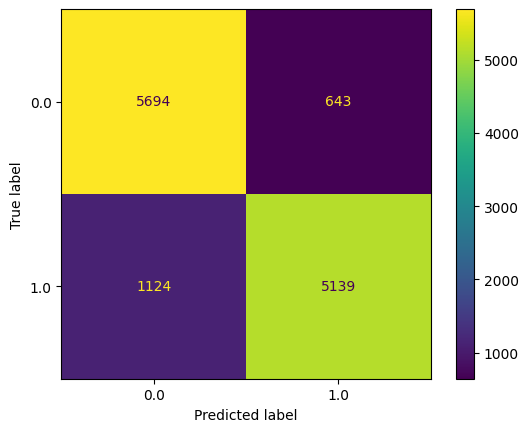

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      6337
         1.0       0.89      0.82      0.85      6263

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600



In [13]:
predictions = clf.predict(X_test_70_30)
cm = confusion_matrix(Y_test_70_30, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_70_30, predictions)
print(report)

In [14]:
clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_80_20, Y_train_80_20)
Y_predTrain = clf.predict(X_train_80_20)
Y_predTest = clf.predict(X_test_80_20)
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_80_20, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_80_20, Y_predTest))

Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8666071428571429
Testing Accuracy:  0.8578571428571429


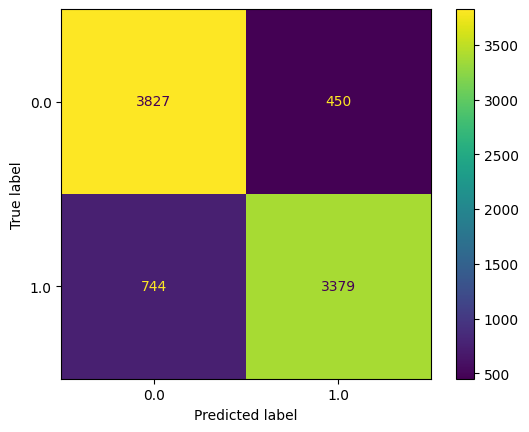

              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      4277
         1.0       0.88      0.82      0.85      4123

    accuracy                           0.86      8400
   macro avg       0.86      0.86      0.86      8400
weighted avg       0.86      0.86      0.86      8400



In [15]:
predictions = clf.predict(X_test_80_20)
cm = confusion_matrix(Y_test_80_20, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

report = classification_report(Y_test_80_20, predictions)
print(report)

#### Conclusion

We are going to select the model trained with the '70:30 training:testing split cir_ncir_pca' dataset with a 'hidden_layer_sizes = [10, 10, 10]' as it provides us with the (marginally) highest training and testing accuracy. This model will be saved to a pickle file for later usage.

In [22]:
# Select the features to be used for Classification
X = dataset_2.drop(columns = 'NLOS')
Y = dataset_2[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Create the Training and Test set with split 70:30 
X_train_70_30, X_test_70_30, Y_train_70_30, Y_test_70_30 = train_test_split(X, Y, test_size=0.3, random_state=RANDOM_STATE)

HIDDEN_LAYER_SIZE = [10, 10, 10]

clf = MLPClassifier(solver='adam', hidden_layer_sizes=HIDDEN_LAYER_SIZE, learning_rate='constant', random_state=RANDOM_STATE, max_iter=1000)
clf.fit(X_train_70_30, Y_train_70_30)
Y_predTrain = clf.predict(X_train_70_30)
Y_predTest = clf.predict(X_test_70_30)
print("MLP trained with cir_ncir_pca_70_30:")
print("-------------------------------")
print("Hidden Layer Size: ", HIDDEN_LAYER_SIZE)
print("Training Accuracy: ", accuracy_score(Y_train_70_30, Y_predTrain))
print("Testing Accuracy: ", accuracy_score(Y_test_70_30, Y_predTest))
print("\n")

save_to_pickle('nn_cir_ncir_pca_70_30', './pickled_models' , clf)

MLP trained with cir_ncir_pca_70_30:
-------------------------------
Hidden Layer Size:  [10, 10, 10]
Training Accuracy:  0.8660204081632653
Testing Accuracy:  0.8597619047619047




<hr>

# <u> References </u>

[1] Google. (n.d.). Classification: Accuracy, recall, precision, and related metrics. Google. https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall (accessed Mar. 16, 2025) <br>
[2] Hyperskill. (n.d.). https://hyperskill.org/learn/step/29339 (accessed Mar. 16, 2025) <br>
